In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# plt.rcParams["axes.grid"] = False
import mne
import ast

In [9]:
sesion = pd.read_csv("datos.csv")[['timestamp', 'sample_number', 'channel_data']]
sesion.channel_data = sesion.channel_data.apply(ast.literal_eval)
# print(sesion.dtypes)
sesion.head()

,timestamp,sample_number,channel_data
0,9758232,1,"[7922286, -27298, 2831676, 5727189, 7875287, 7..."
1,9760237,2,"[7922252, -27422, 2830111, 5725352, 7875266, 7..."
2,9762256,3,"[7922255, -27556, 2829894, 5725179, 7875283, 7..."
3,9764259,4,"[7922301, -27737, 2830356, 5725726, 7875299, 7..."
4,9766266,5,"[7922376, -27967, 2830619, 5725989, 7875402, 7..."


In [10]:
channel_data_df = sesion.channel_data.apply(pd.Series) * 2.4 / (2**23 - 1) # Convert to a millivolts
channel_data_df.columns = ['channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5', 'channel_6', 'channel_7', 'channel_8']
sesion = pd.concat([sesion.drop('channel_data', axis=1), channel_data_df], axis=1)
sesion.timestamp = sesion.timestamp.apply(lambda x: (x - sesion.timestamp.iloc[0]) / 10 ** 6)
sesion.head()

,timestamp,sample_number,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,0.000000,1,2.266584,-0.007810,0.810149,1.638562,2.253138,2.252317,2.253982,2.253328
1,0.002005,2,2.266575,-0.007845,0.809701,1.638037,2.253132,2.252309,2.253980,2.253324
2,0.004024,3,2.266576,-0.007884,0.809639,1.637987,2.253137,2.252314,2.253991,2.253343
3,0.006027,4,2.266589,-0.007936,0.809771,1.638144,2.253141,2.252317,2.253999,2.253355
4,0.008034,5,2.266610,-0.008001,0.809847,1.638219,2.253171,2.252343,2.254031,2.253384


In [11]:
sesion.head(20)

,timestamp,sample_number,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
0,0.000000,1,2.266584,-0.007810,0.810149,1.638562,2.253138,2.252317,2.253982,2.253328
1,0.002005,2,2.266575,-0.007845,0.809701,1.638037,2.253132,2.252309,2.253980,2.253324
2,0.004024,3,2.266576,-0.007884,0.809639,1.637987,2.253137,2.252314,2.253991,2.253343
3,0.006027,4,2.266589,-0.007936,0.809771,1.638144,2.253141,2.252317,2.253999,2.253355
4,0.008034,5,2.266610,-0.008001,0.809847,1.638219,2.253171,2.252343,2.254031,2.253384
5,0.010053,6,2.266636,-0.008049,0.809827,1.638203,2.253204,2.252371,2.254057,2.253401
6,0.012056,7,2.266617,-0.008084,0.809769,1.638138,2.253182,2.252358,2.254010,2.253353
7,0.014063,8,2.266553,-0.008112,0.809791,1.638168,2.253118,2.252295,2.253950,2.253296
8,0.016082,9,2.266596,-0.008129,0.809806,1.638194,2.253150,2.252332,2.254001,2.253346
9,0.018085,10,2.266600,-0.008129,0.809847,1.638230,2.253160,2.252343,2.254001,2.253349


In [12]:
sesion.tail(20)

,timestamp,sample_number,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8
4980,10.006118,4981,2.266514,-0.007678,0.808722,1.636388,2.253064,2.252245,2.253991,2.253345
4981,10.008136,4982,2.266513,-0.007680,0.808723,1.636371,2.253061,2.252243,2.253967,2.253317
4982,10.010140,4983,2.266466,-0.007686,0.808706,1.636356,2.253017,2.252198,2.253914,2.253261
4983,10.012158,4984,2.266458,-0.007676,0.808715,1.636371,2.253011,2.252197,2.253930,2.253282
4984,10.014165,4985,2.266448,-0.007666,0.808749,1.636399,2.253004,2.252189,2.253907,2.253256
4985,10.016172,4986,2.266410,-0.007665,0.808714,1.636363,2.252972,2.252149,2.253877,2.253221
4986,10.018176,4987,2.266418,-0.007668,0.808740,1.636390,2.252977,2.252157,2.253881,2.253226
4987,10.020194,4988,2.266419,-0.007673,0.808772,1.636434,2.252978,2.252153,2.253882,2.253229
4988,10.022194,4989,2.266407,-0.007670,0.808738,1.636403,2.252962,2.252139,2.253868,2.253224
4989,10.024212,4990,2.266429,-0.007664,0.808717,1.636376,2.252971,2.252153,2.253874,2.253234


In [13]:
sesion.shape

(5000, 10)

In [29]:
x1 = sesion.channel_2*-1000
# x2 = sesion.channel_7*1000
t = sesion.timestamp

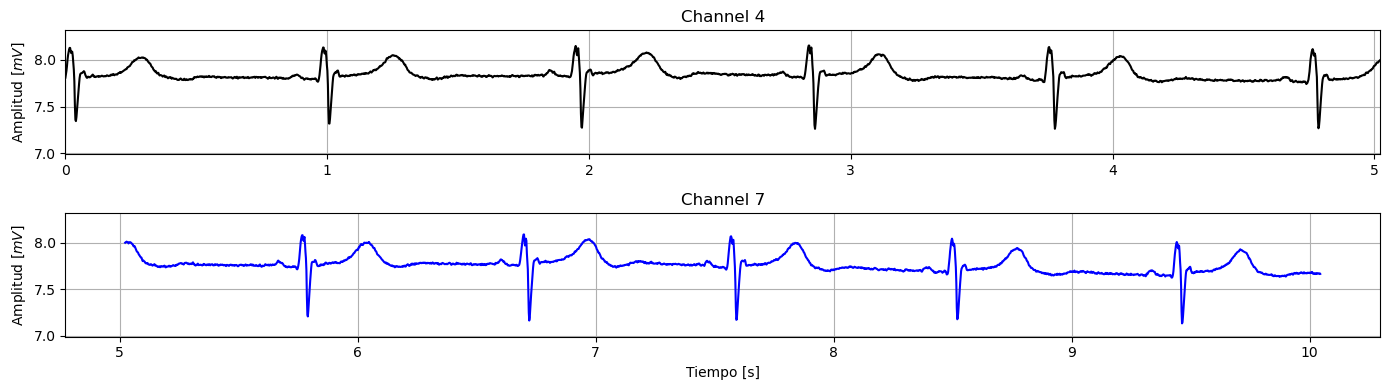

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=1, num=0, figsize=(14, 4), tight_layout=True)
axs[0].plot(t[:2500], x1[:2500], lw=1.5, color='k')
axs[0].set_ylabel('Amplitud [$mV$]') # 'Amplitud [$\mu V$]'
axs[0].set_xlim([t.min(), t[:2500].max()])
axs[0].set_ylim([x1.min() - abs(x1.min() * 0.02), x1.max() +  abs(x1.max() * 0.02)])
axs[0].set_title('Channel 4')
axs[0].grid()

# axs[1].plot(t[N - 200*60:N], x[N - 200*60:N]) #, lw=1.5, color='k')
axs[1].plot(t[2500:], x1[2500:], lw=1.5, color='b')
axs[1].set_xlabel('Tiempo [s]')
axs[1].set_ylabel('Amplitud [$mV$]')
# axs[1].set_xlim([t.max() + dt - 60, t.max() + dt])
axs[1].set_ylim([x1.min() - abs(x1.min() * 0.02), x1.max() +  abs(x1.max() * 0.02)])
axs[1].set_title('Channel 7')
axs[1].grid()

# plt.show()

In [33]:
import scipy.signal

In [34]:
def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

In [56]:
filtered = bandpass(x1, [1, 35], 500.)

In [73]:
if abs(filtered.max()) > abs(filtered.min()):
    y_lim = [np.mean(filtered) - abs(filtered.max() * 1.2), np.mean(filtered) + abs(filtered.max() * 1.2)]
else:
    y_lim = [np.mean(filtered) - abs(filtered.min() * 1.2), np.mean(filtered) + abs(filtered.min() * 1.2)]

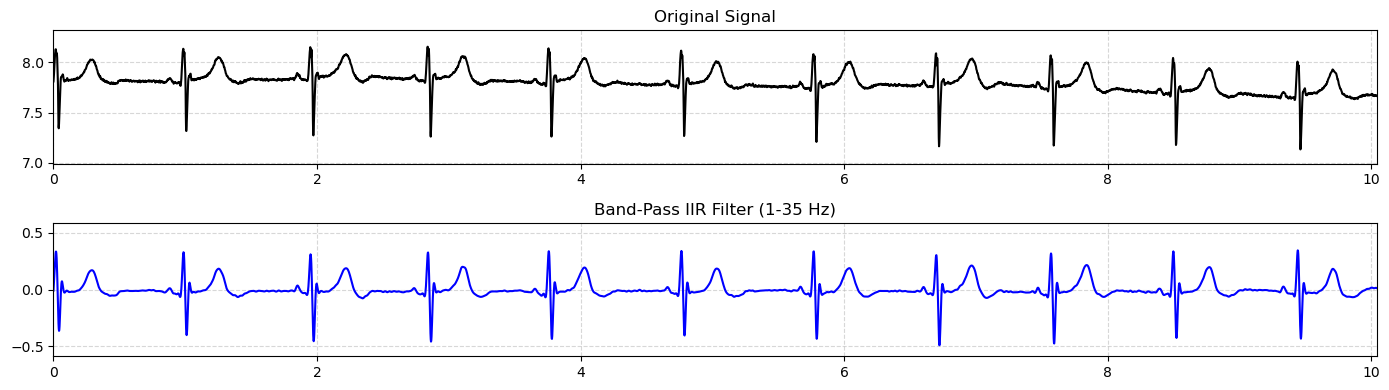

In [72]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, num=0, figsize=(14, 4), tight_layout=True)
ax1.plot(t, x1, lw=1.5, color='k')
ax1.set_ylim([x1.min() - abs(x1.min() * 0.02), x1.max() +  abs(x1.max() * 0.02)])
ax1.set_xlim([t.min(), t.max()])
ax1.set_title("Original Signal")
ax1.margins(0, .1)
ax1.grid(alpha=.5, ls='--')

ax2.plot(t, filtered, lw=1.5, color='b')
ax2.set_ylim(y_lim)
ax2.set_xlim([t.min(), t.max()])
ax2.set_title("Band-Pass IIR Filter (1-35 Hz)")
ax2.grid(alpha=.5, ls='--')

In [9]:
fs = 500.
info = mne.create_info(['channel_1','channel_2','channel_3','channel_4',
                        'channel_5','channel_6','channel_7','channel_8'], 
                       sfreq=fs, ch_types='eeg')
#info.set_montage('standard_1020')
info['description'] = 'Pruebas de EEG'
info['device_info'] = {'type':'Frontend', 'model':'AD8232'}
info['experimenter'] = 'Eloy'
info['line_freq'] = 50.0
info['subject_info'] = {'id':1,'last_name':'Yapur','first_name':'Jhoseline',
                        'birthday':(2002, 5, 12),'sex':2,'hand':1}
data = sesion.loc[:, 'channel_1':'channel_8'].values.T
eeg_raw = mne.io.RawArray(data, info, verbose=True)

Creating RawArray with float64 data, n_channels=8, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     9.998 secs
Ready.


In [10]:
eeg_raw.describe()

<RawArray | 8 x 5000 (10.0 s), ~327 kB, data loaded>
ch  name       type  unit        min         Q1     median         Q3        max
 0  channel_1  EEG   µV    2081587.28  2081874.81  2081970.37  2082065.14  2082381.78
 1  channel_2  EEG   µV      -514.13    -498.39    -495.53    -492.67    -476.65
 2  channel_3  EEG   µV    816201.59  816339.49  816374.11  816416.46  816816.43
 3  channel_4  EEG   µV     -1148.99   -1132.11    -131.03     860.88     878.62
 4  channel_5  EEG   µV     -7204.34   -7137.68     844.72    8804.80    8847.14
 5  channel_6  EEG   µV    143184.77  143464.87  143536.39  143604.20  143660.56
 6  channel_7  EEG   µV     -9025.96   -8968.45    3029.39   14954.00   14997.48
 7  channel_8  EEG   µV         0.00       0.00       0.00       0.00       0.00
